In [1]:
import os
from os import path
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path_name = path.join(path.abspath('..'), 'data')
file_name = 'corrective_maint_job_types.csv'

data_file = path.join(path_name, file_name)

df = pd.read_csv(data_file)

In [3]:
df.head()

,notif,notif_date,floc,order,job_type,catalog_profile,meter_install_date,meter_model,network,postcode,...,weather_date,evapo_trans_0000_2400,rain_0900_0900,pan_evap_0900_0900,max_temp,min_temp,max_rel_humidity,min_rel_humidity,avg_10m_wind_speed,solar_radiation
0,300713965.0,2011-12-21,504107.0,NaN,SPH,MAIN,NaN,NaN,SM,6110.0,...,2011-12-21,7.3,0.0,NaN,28.9,13.6,97.0,32.0,3.87,34.47
1,300719006.0,2011-12-21,673096.0,NaN,SPL,MAIN,NaN,NaN,SM,6111.0,...,2011-12-21,7.9,0.0,NaN,30.6,16.4,82.0,35.0,4.24,34.47
2,300719010.0,2011-12-21,810841.0,NaN,SPH,MAIN,NaN,NaN,NM,6019.0,...,2011-12-21,NaN,NaN,NaN,25.8,NaN,91.0,61.0,4.63,34.24
3,300719430.0,2011-12-21,27.0,NaN,SPH,MAIN,NaN,NaN,NM,6026.0,...,2011-12-21,7.2,0.0,NaN,29.2,17.4,89.0,38.0,3.37,34.38
4,300730505.0,2011-12-21,117547.0,NaN,SF1,DOMMETER,14.01.2014,M8A,SM,6153.0,...,2011-12-21,7.3,0.0,NaN,28.9,13.6,97.0,32.0,3.87,34.47


In [4]:
pivot = df.pivot_table('notif', index='job_type', columns='network', aggfunc='count')
pivot

network,AL,BS,BU,GE,KA,MA,NM,SM
job_type,,,,,,,,
SF1,174.0,163.0,625.0,209.0,131.0,1158.0,5117.0,3958.0
SF2,33.0,11.0,80.0,21.0,13.0,131.0,559.0,372.0
SF3,19.0,20.0,69.0,35.0,54.0,173.0,886.0,458.0
SF4,66.0,33.0,155.0,134.0,84.0,580.0,5319.0,3760.0
SF5,627.0,801.0,2996.0,952.0,1362.0,6946.0,32578.0,23854.0
SF6,170.0,75.0,218.0,75.0,78.0,913.0,4157.0,4057.0
SF7,557.0,52.0,503.0,98.0,187.0,1590.0,9102.0,7311.0
SF8,28.0,1.0,10.0,NaN,4.0,14.0,80.0,117.0
SFA,113.0,36.0,126.0,40.0,56.0,447.0,3369.0,2953.0


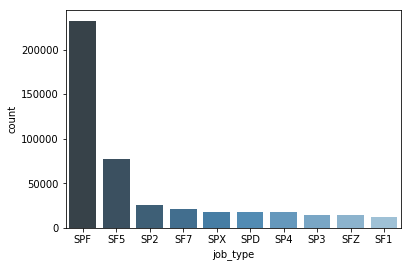

In [5]:
import seaborn
seaborn.countplot(df['job_type'],
                  palette="Blues_d",
                  order=df['job_type'].value_counts().iloc[:10].index
                 )


C:\Users\tdavies\AppData\Local\conda\conda\envs\VV_Forecasting\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


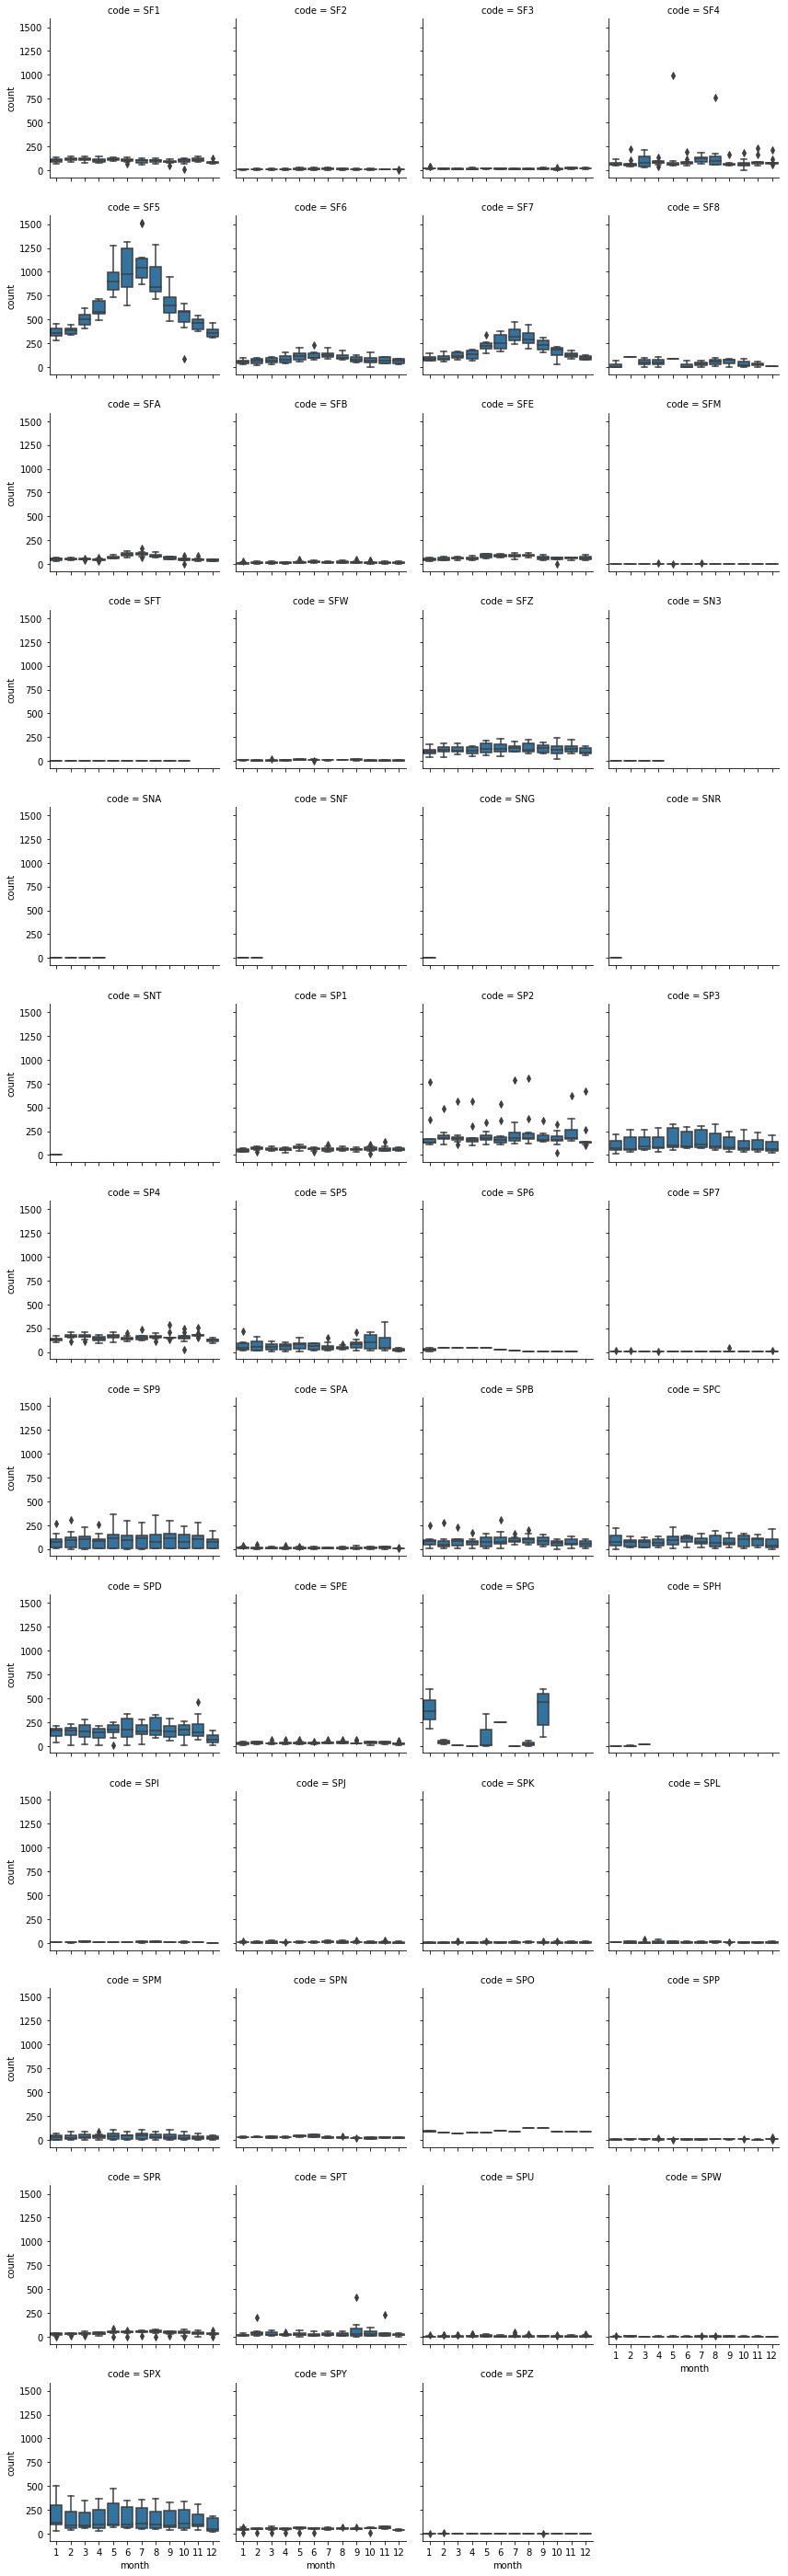

In [6]:
import pandas as pd
import seaborn as sns
from datetime import date
from datetime import time
from datetime import datetime

df['notif_date'] = pd.to_datetime(df['notif_date'])
new_df = df[['notif_date','job_type']]
new_df.set_index('notif_date')

monthly_data=[]
labels = ['code','year', 'month', 'count']

for cat, subcategories in new_df.groupby('job_type'):
    if cat!='SPF':
        job_type = cat
        for yr, year_df in subcategories.groupby(df['notif_date'].dt.year):
            for mnth, month_df in year_df.groupby(df['notif_date'].dt.month):
                new_data=[cat, yr, mnth, len(month_df)]
                #print(new_data)
                monthly_data.append(new_data)
            
       
output = pd.DataFrame.from_records(monthly_data, columns=labels)

g = sns.FacetGrid(output, col='code',  aspect=1, col_wrap=4)
g.map(sns.boxplot, 'month', 'count')

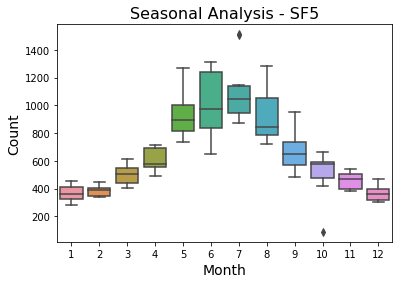

In [7]:
# add lineplot
job_type = 'SF5'
data = output.loc[output['code'] == job_type]
title = 'Seasonal Analysis - ' + job_type

plot = sns.boxplot(x='month', y='count', data=data)
#plot = sns.lineplot(x='month', y='count', data=data, color='blue').set_title(title)

# format plot
plot.axes.set_title("Seasonal Analysis - "+job_type, fontsize=16)
plot.set_xlabel("Month", fontsize=14)
plot.set_ylabel("Count", fontsize=14)
plot.tick_params(labelsize=10)

In [8]:
new_df.head()

,notif_date,job_type
0,2011-12-21,SPH
1,2011-12-21,SPL
2,2011-12-21,SPH
3,2011-12-21,SPH
4,2011-12-21,SF1


In [9]:
new_output = new_df[new_df['job_type'] == 'SF5']
new_output = new_output.pivot_table('job_type', index='notif_date', aggfunc='count')
new_output = new_output.reset_index()

In [10]:
new_output.head()

,notif_date,job_type
0,2009-01-01,2
1,2009-01-02,6
2,2009-01-03,1
3,2009-01-04,2
4,2009-01-05,18


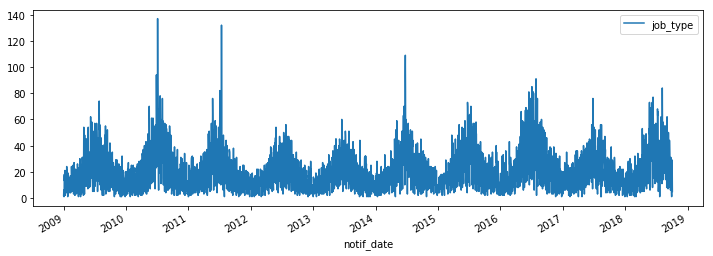

In [11]:
_ = new_output.plot(x='notif_date', y='job_type', figsize=(12,4))

In [12]:
def AR(data, maxlag = 1):
    """
    Implements Autoregression (AR) 
    parameters:
        data: times series data
        maxlag: degree of the model (1 by default)
    return:
        X, y and b (A hat)
    """
    #linear model of order max lag 8)
    #data = df['sunspots'].values
    maxz = data.size  #to separete test and fit data, this should be reduced

    # Computing matrix X
    X = np.array([data[i:(maxz-maxlag-1)+i] for i in range(0, maxlag)])
    # Performing the transponse of X
    X = X.T

    # Computing matrix y
    y = np.array(data[maxlag+1:maxz])

    # Computing the Pseudo-Inverse of X (as X is a rectangular matrix)
    Xinv = np.linalg.pinv(X.copy())
    
    # Solving the linear system b = Xinv * y
    b = np.dot(Xinv, y)
    
    return (X, y, b)

In [13]:
def pred_local_constant_model(data, X, y, maxlag = 1, nstep = 100):
    """
    Implements yp = xi * b to predict nsteps
    parameters:
        data: times series data
        X: data representation
        y: value of the function for each row in X
        maxlag: degree of the model (1 by default)
        nstep: number of steps (100 by default)
    return:
        predictions
    """
        
    #now free-rn from a local constant model
    xinit = data[-maxlag-1:-1]
    xi = xinit
    step = 0
    yp = data[-1]

    #distance function
    dist = lambda x1, x2: math.sqrt(((x1-x2)**2).sum())

    while step < nstep:
        # 1) Compute the distance to the points xi with respect X
        xdm = [dist(xi,xj) for xj in X]
        
        # 2) Sort the distances, rather neat way of finding the second 
        #    smallest without doing a full sort
        ind = np.argpartition(xdm,2)[2]
        # 3) Find the second smallest value to predict the true future
        xp = y[ind]
        
        # update xi and yp
        xi = np.delete(xi,0)
        xi = np.append(xi,xp)
        yp = np.append(yp,xp)
        
        # increment and repeat steps 1, 2 and 3 until step == nstep
        step += 1
        
    return yp

In [59]:
nsteps = 100 # predict the next 100 months
maxlag = 1
X, y, b = AR(new_output['job_type'].values, maxlag)
yp2= pred_local_constant_model(new_output['job_type'].values, X, y, maxlag, nsteps)
yp2
#new_output

array([ 5, 25, 28,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,
        9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,
        5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,
        3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3,
       27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,
        9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27,  9,  5,  3, 27],
      dtype=int64)

In [69]:
# Visualising the Predictions
from datetime import timedelta

# copy dates from output dataframe
days = pd.DataFrame(index=new_output.index)
days['notif_date'] = new_output['notif_date']

columns = ['next_date', 'next_count']
estimates = pd.DataFrame[index=index, columns=columns]
# 
next_date = new_output['notif_date'].values[-1]
next_index = new_output.index[-1]+1
print (next_index)

for i in range(nsteps+1):
    next_date = next_date+np.timedelta64(1,'D')
    next_count = yp2[i]
    
    estimtes = [next_date, next_count]
    days = days.append(estimates)            
    #days.loc[i+next_index][0] = next_date
    #days.loc[i+next_index][1] = next_count

print (days)


plt.figure(figsize=(14,8))
plt.plot(new_output['notif_date'], new_output['job_type'], c='b', label='original')
plt.plot(days, yp2, c='r', label='estimated')
plt.xlabel('date')
plt.ylabel('count')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-69-1a7d7856f4a6>, line 9)

In [ ]:
)